# SMS Spam Detection Analysis

This notebook analyzes a SMS spam collection dataset to build a spam detection model. The dataset contains text messages labeled as either spam or ham (non-spam).

#### Data Overview
- Dataset contains SMS messages with two columns: category (spam/ham) and message text
- Messages are preprocessed by:
    - Converting to lowercase
    - Removing stopwords and punctuation
    - Tokenizing the text
    - Retaining only alphanumeric words

#### Dataset Split
- Training set: 70% of data
- Validation set: 10% of data
- Test set: 20% of data

#### Exploratory Analysis
- Distribution of spam vs ham messages shown in pie chart
- Most frequent words visualized separately for spam and ham messages

#### File Structure
- Original data: SMSSpamCollection
- Processed splits saved as:
    - train_data.csv
    - val_data.csv 
    - test_data.csv

### Importing necessary libraries 

In [5]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv

import warnings
warnings.filterwarnings("ignore")

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aritra
[nltk_data]     Majumder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Reading the data

In [7]:
def read_data(file_path, names, sep='\t'):
    """
    Read data from a file into a pandas DataFrame.
    
    Parameters:
        file_path (str): Path to the data file
        sep (str): Separator used in the file (default: '\t')
        column_names (list): List of column names (default: ['category', 'message'])
    
    Returns:
        pandas.DataFrame: DataFrame containing the SMS data
    """
        
    data = pd.read_csv(
        file_path,
        sep=sep,
        names=names
    )
    
    return data

In [8]:

data = read_data('sms-spam-collection/SMSSpamCollection', names=['category', 'message'])
data

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Visualization of `Class imbalance`

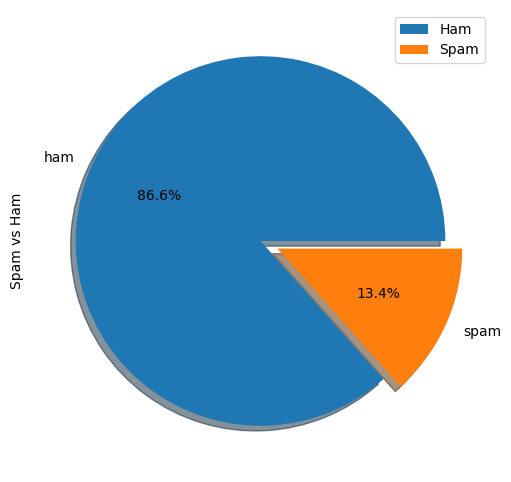

In [9]:
data["category"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

### Data preprocessing

In [10]:
def process_text(text):
    text = text.lower()
    words = nltk.word_tokenize(text)

    processed_text = [
        word for word in words 
        if (word.isalnum() 
            and word not in stopwords.words('english') 
            and word not in string.punctuation)
    ]
    
    return ' '.join(processed_text)

data['processed_message'] = data['message'].map(process_text)

In [11]:
def show_random_subset(df, size):
    """
    Returns a random subset of the given DataFrame with specified size.
        
    Parameters:
        df (pandas.DataFrame): Input DataFrame to sample from
        size (int): Number of samples to return
            
    Returns:
        pandas.DataFrame: Random subset of original DataFrame with size rows
    """
    size = min(size, len(df))
    
    random_subset = df.sample(n=size, random_state=42)
    
    return random_subset.reset_index(drop=True)

In [12]:
data = data.drop(columns=['message'])
show_random_subset(data, 10)

,category,processed_message
0,ham,squeeeeeze christmas hug u lik frndshp den hug...
1,ham,also sorta blown couple times recently id rath...
2,ham,mmm thats better got roast b better drinks 2 g...
3,ham,mm kanji dont eat anything heavy ok
4,ham,ring comes guys costumes gift future yowifes h...
5,ham,sary need tim bollox hurt lot tol
6,ham,love decision feeling could decide love life w...
7,ham,supervisor find 4 one lor thk students havent ...
8,ham,dear good morning
9,ham,chennai velachery


### Splitting the `dataset`

In [13]:
def split_data(data, train_pct=0.7, val_pct=0.1, test_pct=0.2, random_state=42):
    """
    Split data into train, validation and test sets based on percentage inputs
    
    Parameters:
        data (DataFrame): Input DataFrame to split
        train_pct (float): Percentage of data for training (default 0.7)
        val_pct (float): Percentage of data for validation (default 0.1)
        test_pct (float): Percentage of data for testing (default 0.2)
        random_state (int): Random seed for reproducibility
        
    Returns:
        tuple: (train_data, val_data, test_data)
    """
    assert round(train_pct + val_pct + test_pct, 3) == 1.0, "Percentages must sum to 1"
    
    train_data, temp_data = train_test_split(
        data, 
        train_size=train_pct,
        random_state=random_state,
        stratify=data['category']
    )
    
    val_ratio = val_pct / (val_pct + test_pct)
    val_data, test_data = train_test_split(
        temp_data,
        train_size=val_ratio,
        random_state=random_state,
        stratify=temp_data['category']
    )
    
    print(f"Training data: {len(train_data)} samples ({train_pct*100:.1f}%)")
    print(f"Validation data: {len(val_data)} samples ({val_pct*100:.1f}%)")
    print(f"Test data: {len(test_data)} samples ({test_pct*100:.1f}%)")
    
    return train_data, val_data, test_data

train_data, val_data, test_data = split_data(data)

Training data: 3900 samples (70.0%)
Validation data: 557 samples (10.0%)
Test data: 1115 samples (20.0%)


### Visualizing the most frequent words for both the classes

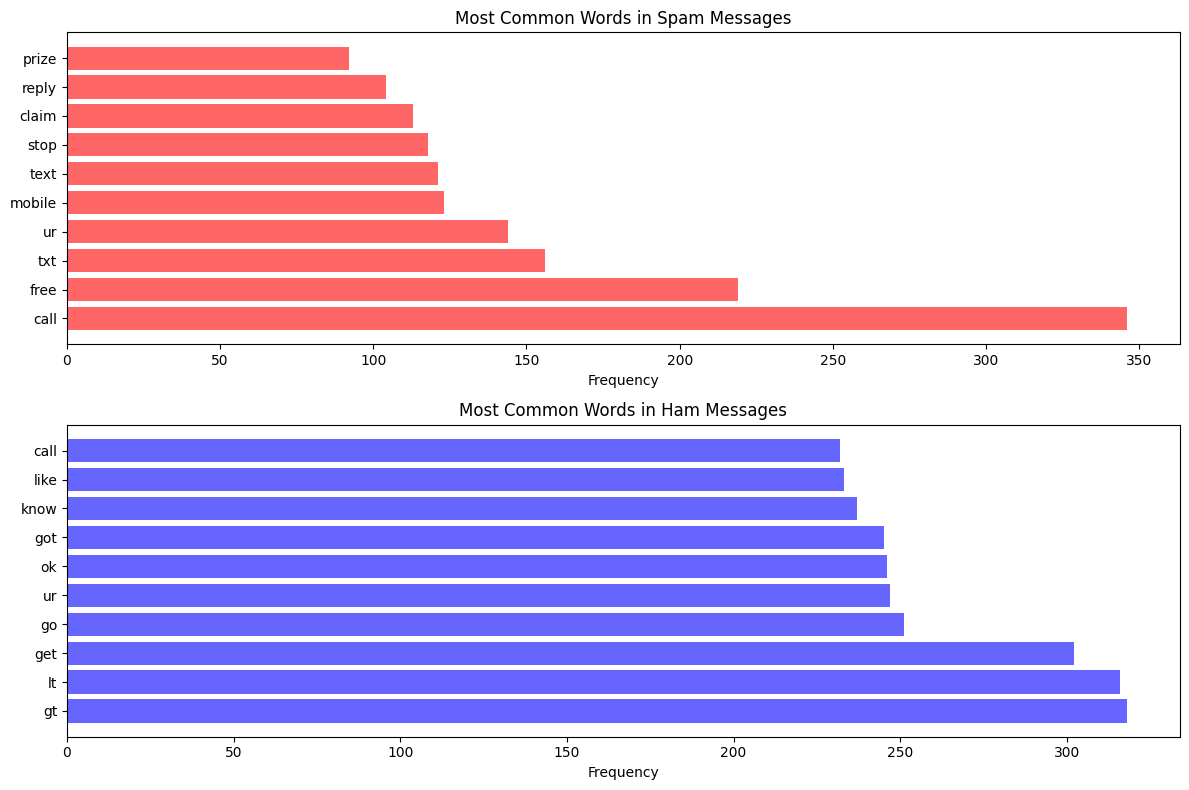

In [14]:
from collections import Counter
import numpy as np

spam_messages = ' '.join(data[data['category'] == 'spam']['processed_message'])
ham_messages = ' '.join(data[data['category'] == 'ham']['processed_message'])

def filter_words(text):
    return ' '.join([word for word in text.split() if not word.isnumeric() and len(word) > 1])

spam_messages = filter_words(spam_messages)
ham_messages = filter_words(ham_messages)

spam_words = Counter(spam_messages.split()).most_common(10)
ham_words = Counter(ham_messages.split()).most_common(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

words, counts = zip(*spam_words)
ax1.barh(words, counts, color='red', alpha=0.6)
ax1.set_title('Most Common Words in Spam Messages')
ax1.set_xlabel('Frequency')

words, counts = zip(*ham_words)
ax2.barh(words, counts, color='blue', alpha=0.6)
ax2.set_title('Most Common Words in Ham Messages')
ax2.set_xlabel('Frequency')

plt.tight_layout()
plt.show()

### Saving the data for further processing

In [15]:
def save_data(df, path):
    """
    Save DataFrame to CSV file.
    
    Parameters:
        df (DataFrame): Data to save
        path (str): File path where data will be saved
    """
    try:
        df.to_csv(path, index=False)
        print(f"Successfully saved {path}")
    except Exception as e:
        print(f"Error saving file {path}: {str(e)}")

In [16]:
save_data(train_data, 'sms-spam-collection/train_data.csv')
save_data(val_data, 'sms-spam-collection/val_data.csv')
save_data(test_data, 'sms-spam-collection/test_data.csv')

Successfully saved sms-spam-collection/train_data.csv
Successfully saved sms-spam-collection/val_data.csv
Successfully saved sms-spam-collection/test_data.csv
